# Sentiment Analysis

* Sentiment per Season
* Sentiment per Episode
* Sentiment throughout the episode
* Relation between Episode's Sentiment and IMDB rank

In [14]:
import pandas as pd
import numpy as np
import nltk
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## Get the Data
* The transcripts of the first 3 seasons
* The labMT

In [2]:
directory = "../Data/Transcripts"
def extract_episode_season_title(file_name):
    file_name = file_name.replace(".txt", "")
    parts = file_name.split("_")
    # season, episode no, title
    return int(parts[0]),int(parts[1]),parts[2] 

seasons = []
episodes = []
titles = []
transcripts = []
for filename in os.listdir(directory):
    season, episode, title = extract_episode_season_title(filename)
    seasons.append(season)
    episodes.append(episode)
    titles.append(title)
    #print(f"{season} {episode} {title}")
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        f = open(f,'r')
        transcript = f.read()
        transcripts.append(transcript)
        
transcripts_df = pd.DataFrame({'season': seasons, 'episode_num': episodes,
                              'episode_name': titles, 'transcript': transcripts})
transcripts_df.sort_values(['season', 'episode_num'], ascending=[True, True], inplace = True)
transcripts_df = transcripts_df.reset_index().drop('index', axis = 1)
transcripts_df.head()

transcripts_df.to_csv("../Data/transcripts.csv")

In [3]:
labmit1 = pd.read_table("../Data/labMIT-1.0.txt")

#create a dictionary with key the word and value the happinesss average
labmit1_dictionary = dict(zip(labmit1["word"], labmit1["happiness_average"]))

#remove words with sentiment from 4 to 6 
labmit1_dictionary = {word: sentiment for word, sentiment 
                                in labmit1_dictionary.items() 
                                if sentiment <= 4 or sentiment >= 6}

def calculate_sentiment(tokens_list):
    freq = nltk.FreqDist(w for w in tokens_list if w in labmit1_dictionary.keys())
    freq_count = sum(list(freq.values())) 
    sentiment_count = sum(labmit1_dictionary[w]*freq[w] for w in freq.keys())
    if(freq_count != 0):
        return sentiment_count/freq_count
    else:
        return -1
    
def tokenize_and_lemmatize(x):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    lemmatizer = nltk.WordNetLemmatizer()
    
    tokens = tokenizer.tokenize(x)
    lemmatized_tokens = [ lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens
# #create a dictionary with the tokenized lower text as value and key characterName
# tokens = dict()

# #remove punctuation
# tokenizer = RegexpTokenizer(r'\w+')

# for item in wikipages_text.items():    
#     tokens[item[0]] = tokenizer.tokenize(item[1].lower())
    
    
# #calculate sentiment per character
# sentiment_per_character = dict(zip(tokens.keys(), map(calculate_sentiment,tokens.values())))

# #remove characters that in their pages no word was found
# sentiment_per_character = {key:value for key,value in sentiment_per_character.items() if value > -1}

## Sentiment per episode

In [4]:
transcripts_df['transcript'] = transcripts_df['transcript'].str.lower()
transcripts_df['transcript'] = transcripts_df['transcript'].apply(tokenize_and_lemmatize)
transcripts_df.head()

,season,episode_num,episode_name,transcript
0,1,1,Pilot,"[morty, you, got, to, come, on, you, got, to, ..."
1,1,2,Lawnmowner Dog,"[coin, collecting, is, considered, the, perfec..."
2,1,3,Anatomy Park,"[mmm, jerry, you, are, really, giving, it, to,..."
3,1,4,M. Night Shaym-Aliens!,"[rick, t, t, t, this, is, just, sloppy, crafts..."
4,1,5,Meeseeks and Destroy,"[run, morty, do, it, hit, the, button, now, i,..."


In [12]:
transcripts_df['sentiment_score'] = transcripts_df['transcript'].apply(calculate_sentiment)

transcripts_df

,season,episode_num,episode_name,transcript,sentiment_score
0,1,1,Pilot,"[morty, you, got, to, come, on, you, got, to, ...",6.036189
1,1,2,Lawnmowner Dog,"[coin, collecting, is, considered, the, perfec...",5.908995
2,1,3,Anatomy Park,"[mmm, jerry, you, are, really, giving, it, to,...",6.006583
3,1,4,M. Night Shaym-Aliens!,"[rick, t, t, t, this, is, just, sloppy, crafts...",6.079223
4,1,5,Meeseeks and Destroy,"[run, morty, do, it, hit, the, button, now, i,...",6.026217
5,1,6,Rick Potion #9,"[principal, vagina, here, don, t, let, the, na...",5.921705
6,1,7,Raising Gazorpazorp,"[look, i, m, not, paying, 70, smidgen, for, a,...",5.957477
7,1,8,Rixty Minutes,"[cynthia, oh, my, god, no, no, i, told, you, h...",6.002376
8,1,9,Something Ricked This Way Comes,"[hey, rick, i, have, to, make, a, project, for...",5.982332
9,1,10,Close Rick-Counters of the Rick Kind,"[so, dad, guess, what, tomorrow, is, martin, l...",5.889815


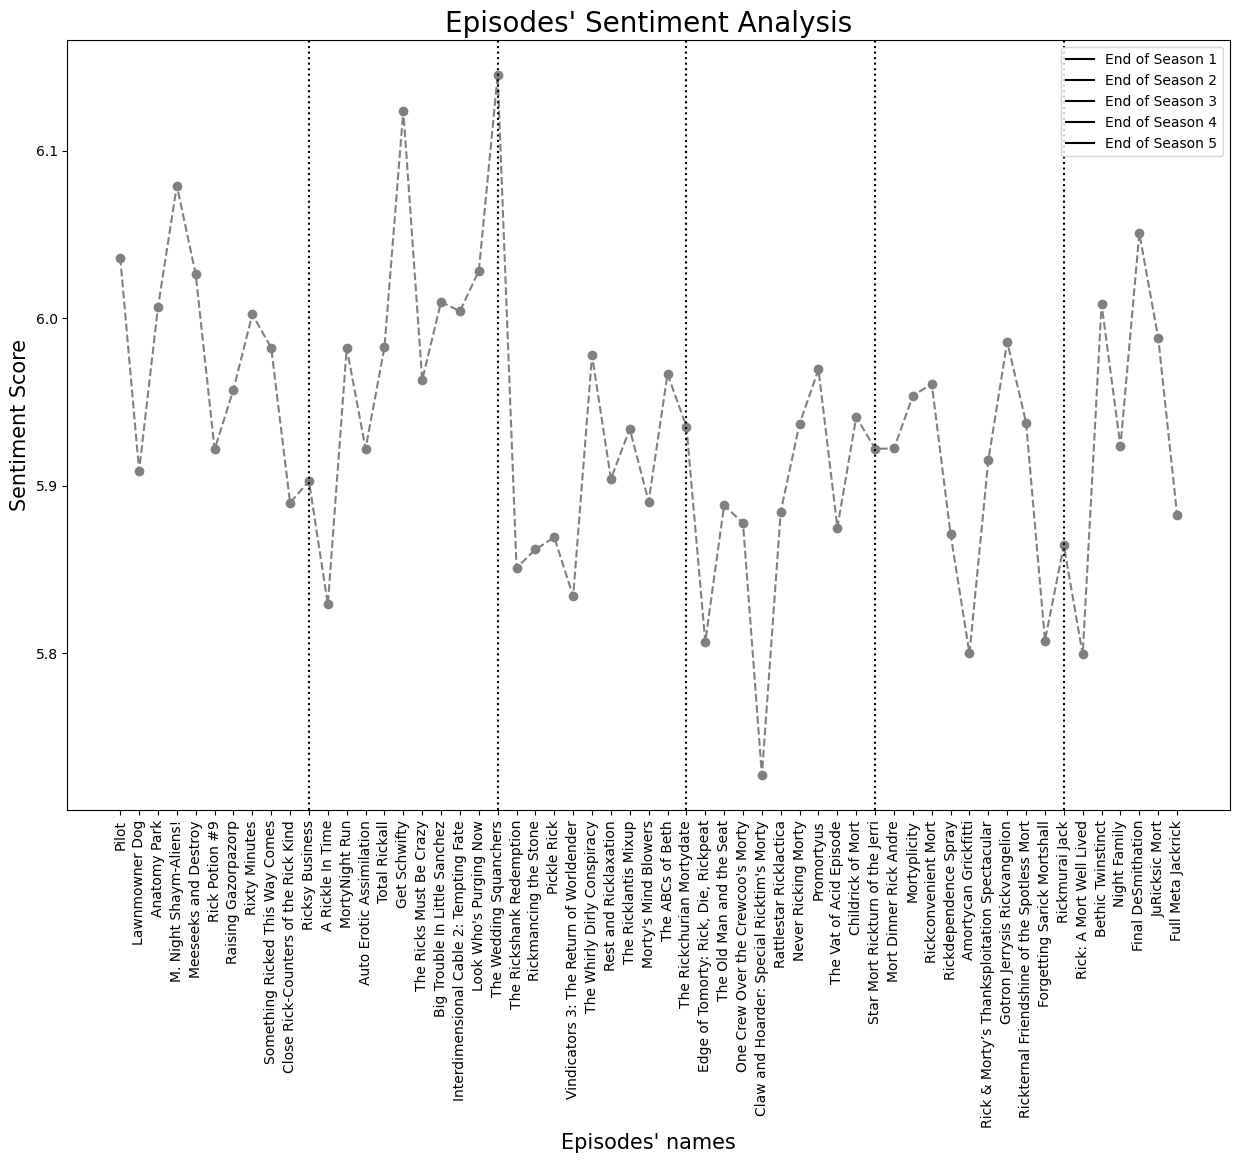

In [30]:
# plot 
fig, ax = plt.subplots(figsize = (15,10))
#plt.bar(transcripts_df['episode_name'], transcripts_df['sentiment_score'])

#plt.step(transcripts_df['episode_name'], transcripts_df['sentiment_score'], label='pre (default)')
plt.plot(transcripts_df['episode_name'], transcripts_df['sentiment_score'], 'o--', color='grey')
legends = [Line2D([0], [0], marker=None, color="k", label= "End of Season 1"),
          Line2D([0], [0], marker=None, color="k", label= "End of Season 2"),
          Line2D([0], [0], marker=None, color="k", label= "End of Season 3"),
          Line2D([0], [0], marker=None, color="k", label= "End of Season 4"),
          Line2D([0], [0], marker=None, color="k", label= "End of Season 5")]

ax.axvline('Ricksy Business', color="k", linestyle = ":")
ax.axvline('The Wedding Squanchers', color="k", linestyle = ":")
ax.axvline('The Rickchurian Mortydate', color="k", linestyle = ":")
ax.axvline('Star Mort Rickturn of the Jerri', color="k", linestyle = ":")
ax.axvline('Rickmurai Jack', color="k", linestyle = ":")
ax.set_xlabel("Episodes' names", size = 15)
ax.set_ylabel("Sentiment Score", size = 15)
plt.xticks(rotation=90)
plt.legend(handles = legends, loc=1, fontsize = 10)
plt.title("Episodes' Sentiment Analysis", size=20)
#plt.legend(handles = legends, loc=1, fontsize = 10)
plt.show()





# plt.figure(figsize=(30, 18))
# plt.plot(transcripts_df['episode_name'], transcripts_df['sentiment_score'])
# plt.xticks(rotation=90)
# plt.title("Episode Sentiment Analysis")
# plt.xlabel("Episodes")
# plt.ylabel("Sentiment Score")
# plt.show()
# last episode: 1. 11, 2. 10, 3. 10, 4. 10, 5. 10, 6. 7

## Sentiment throughout the episode

In [21]:
transcripts_df2 = pd.read_csv("../Data/transcripts.csv")
transcripts_df2['transcript'] = transcripts_df2['transcript'].str.lower()
transcripts_df2['transcript'] = transcripts_df2['transcript'].apply(tokenize_and_lemmatize)

def split_into_3(transcript, part):
    length = len(transcript)
    if part == 1:
        first_part = transcript[:int(length/3)]
        return first_part
    elif part == 2:
        second_part = transcript[int(length/3):int(2*length/3)]
        return second_part
    elif part ==3:
        third_part = transcript[int(2*length/3):length]
        return third_part
    else:
        return []

transcripts_df2['first_part'] = transcripts_df2['transcript'].apply(lambda x: split_into_3(x,1))
transcripts_df2['second_part'] = transcripts_df2['transcript'].apply(lambda x: split_into_3(x,2))
transcripts_df2['third_part'] = transcripts_df2['transcript'].apply(lambda x: split_into_3(x,3))

In [22]:
transcripts_df2['first_part_sentiment_score'] = transcripts_df2['first_part'].apply(calculate_sentiment)
transcripts_df2['second_part_sentiment_score'] = transcripts_df2['second_part'].apply(calculate_sentiment)
transcripts_df2['third_part_sentiment_score'] = transcripts_df2['third_part'].apply(calculate_sentiment)

In [23]:
transcripts_df2.head()

,Unnamed: 0,season,episode_num,episode_name,transcript,first_part,second_part,third_part,first_part_sentiment_score,second_part_sentiment_score,third_part_sentiment_score
0,0,1,1,Pilot,"[morty, you, got, to, come, on, you, got, to, ...","[morty, you, got, to, come, on, you, got, to, ...","[s, not, rehash, that, fight, i, sense, that, ...","[hour, over, the, last, two, month, what, why,...",6.068278,6.032713,6.007335
1,1,1,2,Lawnmowner Dog,"[coin, collecting, is, considered, the, perfec...","[coin, collecting, is, considered, the, perfec...","[gross, whoa, whoa, whoa, what, s, the, matter...","[you, re, perfectly, scary, enough, a, it, is,...",6.165382,5.725389,5.852539
2,2,1,3,Anatomy Park,"[mmm, jerry, you, are, really, giving, it, to,...","[mmm, jerry, you, are, really, giving, it, to,...","[follow, u, into, the, respiratory, system, th...","[you, anything, man, you, are, who, you, are, ...",6.135268,5.846466,6.012617
3,3,1,4,M. Night Shaym-Aliens!,"[rick, t, t, t, this, is, just, sloppy, crafts...","[rick, t, t, t, this, is, just, sloppy, crafts...","[w, what, do, they, want, rick, well, that, wo...","[i, m, not, saying, it, should, win, an, award...",5.998613,6.086863,6.147774
4,4,1,5,Meeseeks and Destroy,"[run, morty, do, it, hit, the, button, now, i,...","[run, morty, do, it, hit, the, button, now, i,...","[fee, fi, fo, fum, just, give, up, morty, this...","[to, follow, you, into, some, nonsensical, bul...",6.199871,5.908859,5.978530


In [24]:
print(transcripts_df2['first_part_sentiment_score'].mean())
print(transcripts_df2['second_part_sentiment_score'].mean())
print(transcripts_df2['third_part_sentiment_score'].mean())

5.980151841524437
5.9096874577396425
5.912848728438803


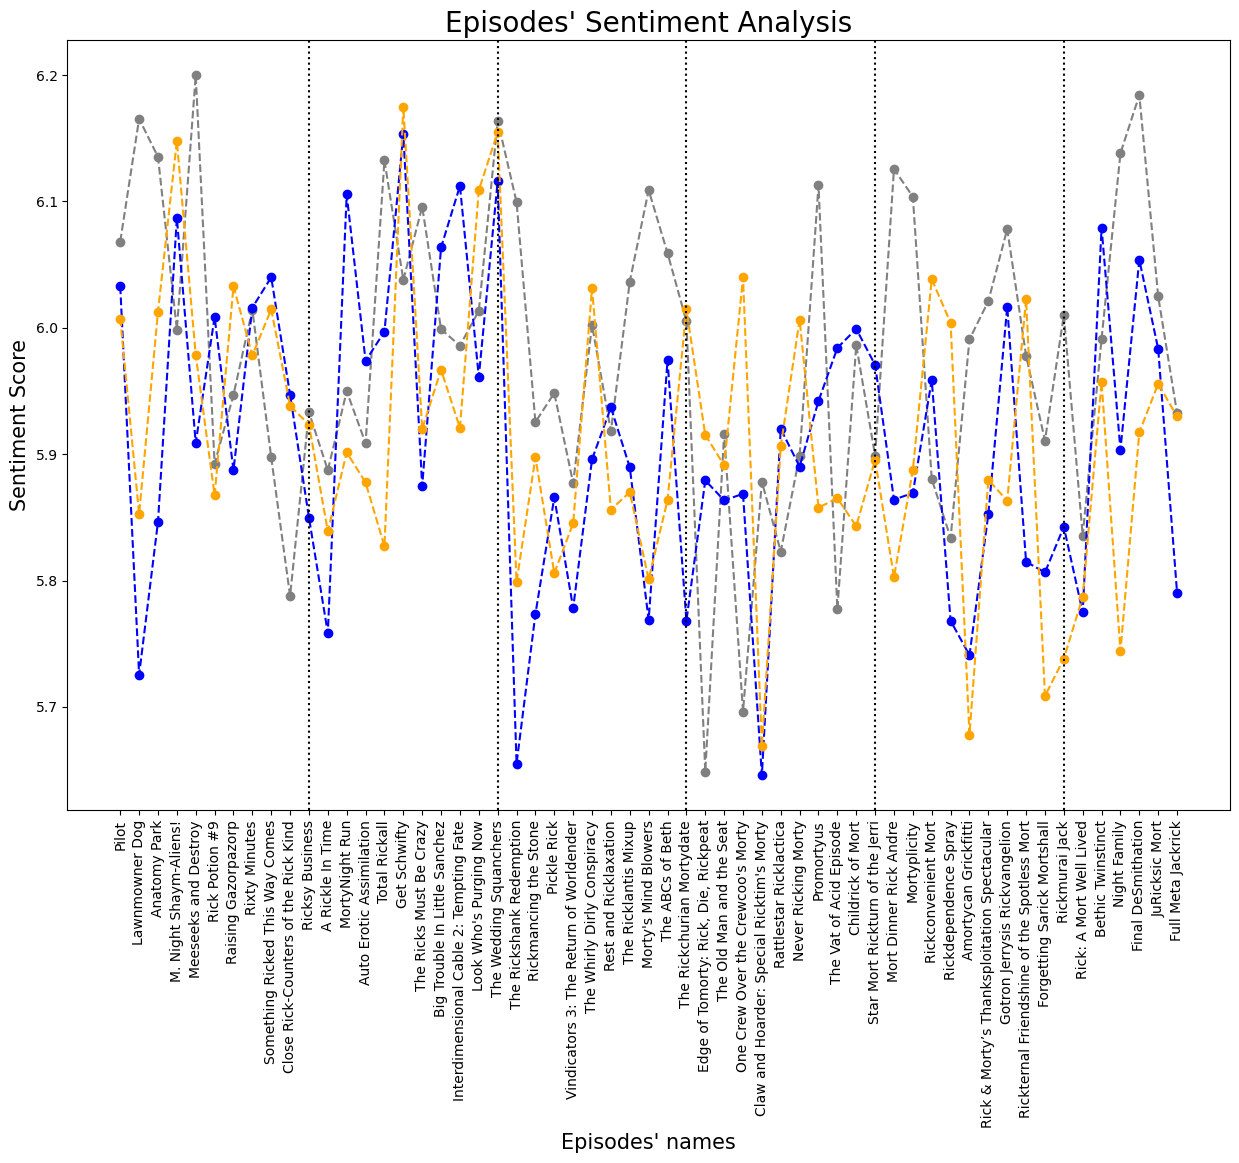

In [32]:
# plot 
fig, ax = plt.subplots(figsize = (15,10))
plt.plot(transcripts_df2['episode_name'], transcripts_df2['first_part_sentiment_score'],
         'o--', color='grey',label='first part')
plt.plot(transcripts_df2['episode_name'], transcripts_df2['second_part_sentiment_score'],
         'o--', color='blue',label='second part')
plt.plot(transcripts_df2['episode_name'], transcripts_df2['third_part_sentiment_score'],
         'o--', color='orange',label='third part')
legends = [Line2D([0], [0], marker=None, color="k", label= "End of Season 1"),
          Line2D([0], [0], marker=None, color="k", label= "End of Season 2"),
          Line2D([0], [0], marker=None, color="k", label= "End of Season 3"),
          Line2D([0], [0], marker=None, color="k", label= "End of Season 4"),
          Line2D([0], [0], marker=None, color="k", label= "End of Season 5")]

ax.axvline('Ricksy Business', color="k", linestyle = ":")
ax.axvline('The Wedding Squanchers', color="k", linestyle = ":")
ax.axvline('The Rickchurian Mortydate', color="k", linestyle = ":")
ax.axvline('Star Mort Rickturn of the Jerri', color="k", linestyle = ":")
ax.axvline('Rickmurai Jack', color="k", linestyle = ":")
ax.set_xlabel("Episodes' names", size = 15)
ax.set_ylabel("Sentiment Score", size = 15)
plt.xticks(rotation=90)
#plt.legend(handles = legends, loc=1, fontsize = 10)
plt.title("Episodes' Sentiment Analysis", size=20)
#plt.legend(handles = legends, loc=1, fontsize = 10)
plt.show()
